In [50]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


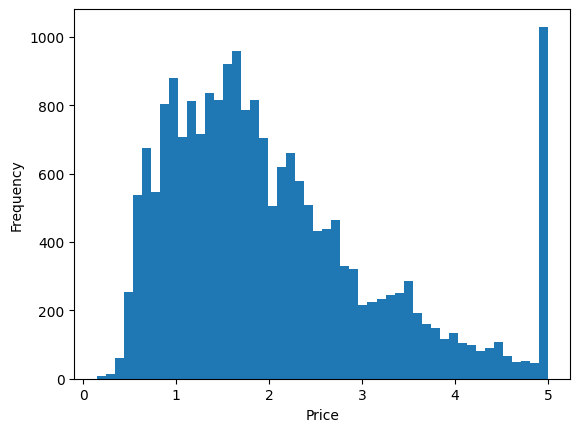

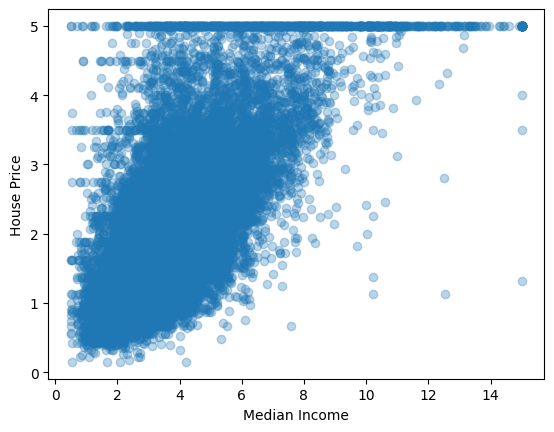

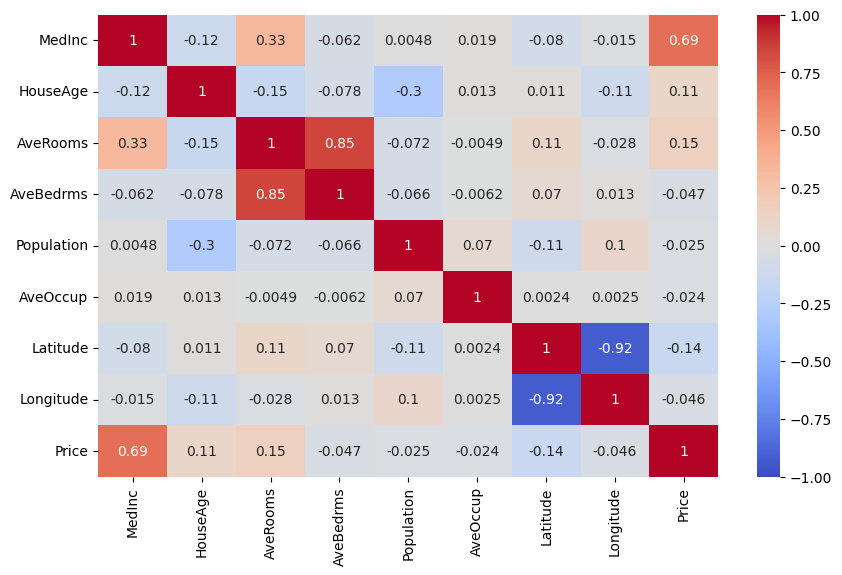

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.scatter(df['MedInc'], df['Price'], alpha = 0.3)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

MSE: 0.56


In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)

y_pred_poly = model_poly.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
print(f'MSE с полиномами: {mse_poly:.2f}')

MSE с полиномами: 0.42


In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("Важность признаков в Random Forest:\n", importances)

Важность признаков в Random Forest:
       Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [56]:
import numpy as np

weights = pd.DataFrame({
    'Feature': X.columns,
    'Weight': np.abs(model.coef_)
}).sort_values('Weight', ascending=False)

print(weights)

weights_scaled = pd.DataFrame({
    'Feature': X.columns,
    'Weight': np.abs(model_scaled.coef_)
}).sort_values('Weight', ascending=False)

print("Веса после нормализации:\n", weights_scaled)

      Feature    Weight
3   AveBedrms  0.783145
0      MedInc  0.448675
7   Longitude  0.433708
6    Latitude  0.419792
2    AveRooms  0.123323
1    HouseAge  0.009724
5    AveOccup  0.003526
4  Population  0.000002
Веса после нормализации:
       Feature    Weight
6    Latitude  0.899886
7   Longitude  0.870541
0      MedInc  0.829619
3   AveBedrms  0.305696
2    AveRooms  0.265527
1    HouseAge  0.118752
5    AveOccup  0.039326
4  Population  0.004503
